# TODO: Task 2 - Approximating linear vector fields

In [1]:
# All imports (TODO: Remove the ones that you don't use and add appropriate packages if necessary)
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.spatial.distance import cdist
import utils
%reload_ext autoreload
%autoreload 2

# Load data
x0 = np.loadtxt('../../data/linear_vectorfield_data_x0.txt')
x1 = np.loadtxt('../../data/linear_vectorfield_data_x1.txt')

### TODO: Part 1 - Estimate the linear vector field that was used to generate the points $x_1$ from the points $x_0$

In [2]:
delta_T = 0.1

v = (x1-x0)/delta_T
#solve_ivp()
x1[0:1,:]

array([[-0.14754604,  0.40615976]])

In [3]:
x0[0:1,:]

array([[-0.16595599,  0.44064899]])

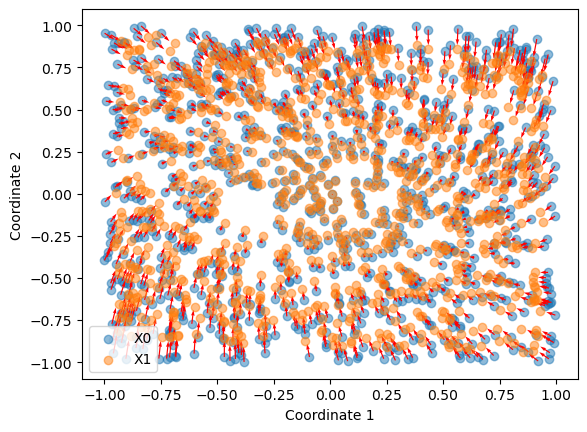

In [4]:
plt.scatter(x0[:,0],x0[:,1], label = 'X0', alpha= 0.5)
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5)
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.legend()

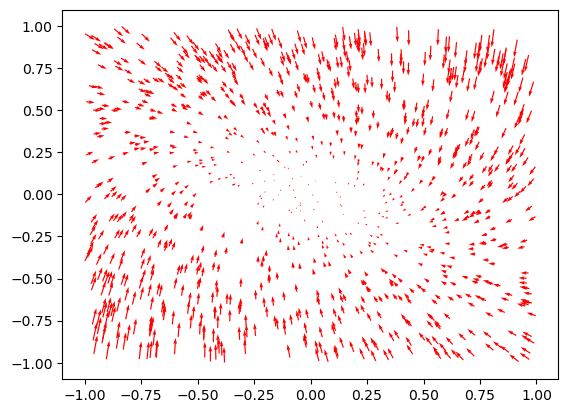

In [5]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r')

updated


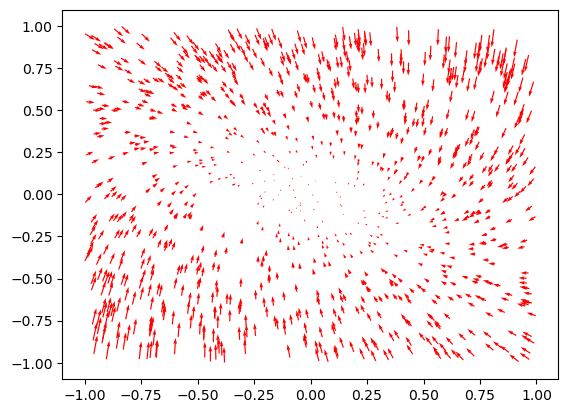

In [6]:
approx = utils.transform(x0, utils.least_squares(x0,v))
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'r')

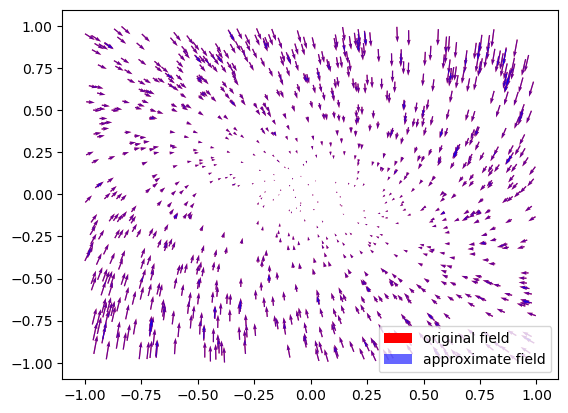

In [7]:
plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], approx[:,0], approx[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.legend()

In [8]:
utils.least_squares(x0,v)

array([[-4.93552450e-01, -4.63823204e-01],
       [ 2.31911527e-01, -9.57375731e-01],
       [-1.41086515e-09,  2.23922683e-09],
       [-1.41086321e-09,  2.23921872e-09]])

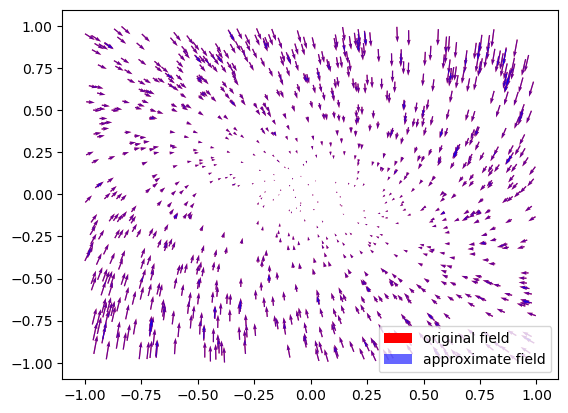

In [9]:
A_estim = utils.least_squares(x0,v)[0:2,0:2]
v_field_estim = x0@A_estim

plt.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], color= 'r', label= 'original field')
plt.quiver(x0[:,0], x0[:,1], v_field_estim[:,0], v_field_estim[:,1], color= 'b', alpha= 0.6, label ='approximate field')
plt.legend()

### TODO: Part 2 - Solve the linear system and compute the mean squared error

In [89]:
def f(t, y):
    return np.dot(y, A_estim)

In [23]:
approx_x1 = utils.x1_estim(f,x0, delta_T)

In [64]:
utils.mean_squared_error(x1, approx_x1)

9.957557138537568e-06

In [70]:
utils.error(x1, approx_x1)

9.95755713853758e-06

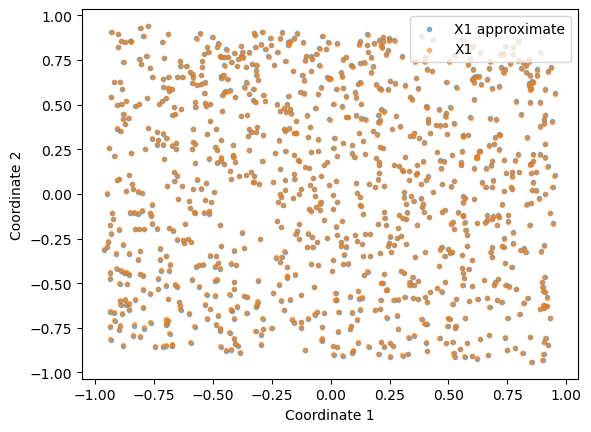

In [72]:
plt.scatter(approx_x1[:,0],approx_x1[:,1], label = 'X1 approximate', alpha= 0.5, marker='.')
plt.scatter(x1[:,0], x1[:,1], label = 'X1', alpha=0.5, marker= '.')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.legend()

###  TODO: Part 3 - Visualize trajectories and phase portrait 

In [124]:
T_end = 100
t_eval = np.arange(0,100.1,delta_T)
solve = solve_ivp(f, [0,T_end], np.array([10,10]), t_eval= t_eval)

In [125]:
t_eval

array([  0. ,   0.1,   0.2, ...,  99.8,  99.9, 100. ])

In [162]:
trajectory = trajectory

Text(0.5, 1.0, 'Predicted trajectory')

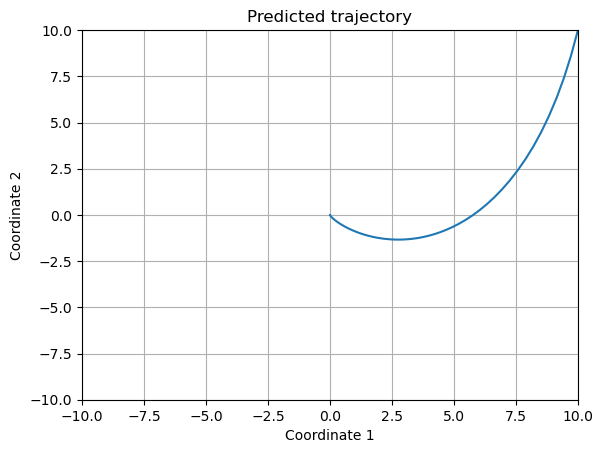

In [158]:
plt.plot(trajectory[:,0],trajectory[:,1])
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Predicted trajectory")

Text(0, 0.5, 'Coordinate 2')

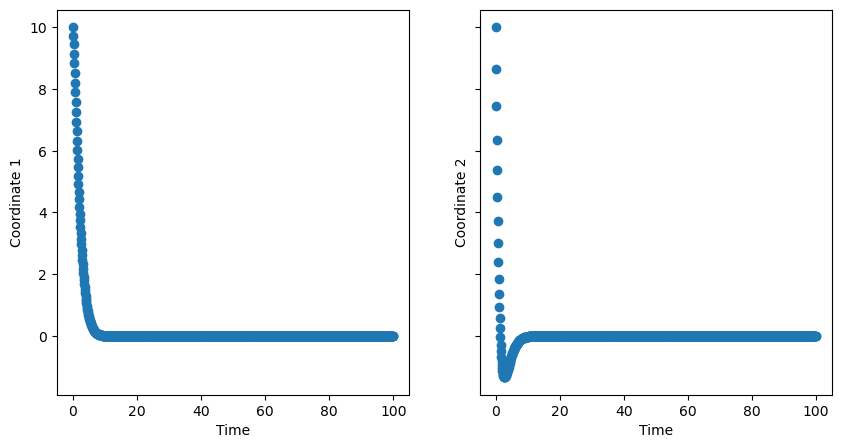

In [163]:
fig,ax = plt.subplots(1,2,figsize = (10,5), sharex=True, sharey=True)

ax[0].scatter(solve.t,trajectory[:,0])
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Coordinate 1")
#ax[0].xlim(0,100)
#ax[0].ylim(-10,10)

ax[1].scatter(solve.t,trajectory[:,1])
ax[1].set_xlabel("Time")
ax[1].set_ylabel("Coordinate 2")
#ax[1].xlim(0,100)
#ax[1].ylim(-10,10)

In [164]:
#phase portrait
speeds = [trajectory[i+1:i+2,:]-trajectory[i:i+1,:] for i in range(len(trajectory))]

In [165]:
speeds_stack = speeds[0]
for i in range(len(speeds)-1):
    speeds_stack = np.vstack((speeds_stack, speeds[i+1]))

In [166]:
speeds_stack

array([[-2.70947575e-01, -1.34926625e+00],
       [-2.86327541e-01, -1.21445593e+00],
       [-2.98048265e-01, -1.09133594e+00],
       ...,
       [ 5.38120388e-08,  2.19694583e-08],
       [ 5.16694386e-08,  1.76281333e-08],
       [ 4.95335443e-08,  1.37849274e-08]])

Text(0, 0.5, 'Speed')

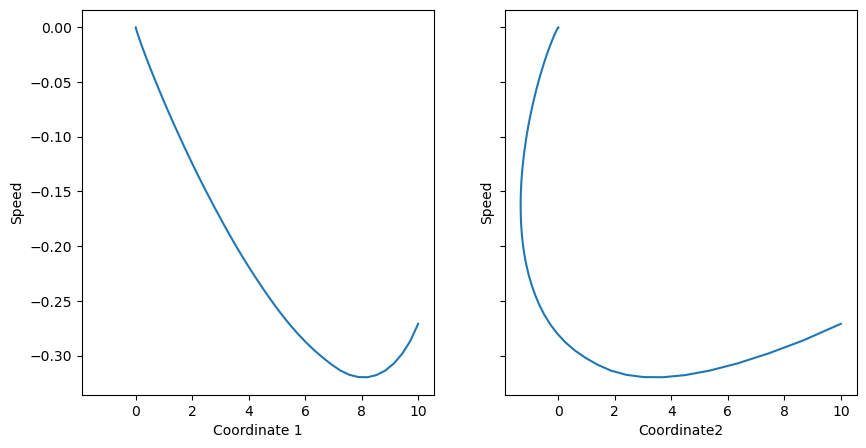

In [167]:
fig,ax = plt.subplots(1,2,figsize = (10,5), sharex=True, sharey=True)

ax[0].plot(trajectory[:1000,0], speeds_stack[:,0])
ax[0].set_xlabel("Coordinate 1")
ax[0].set_ylabel("Speed")
#ax[0].xlim(0,100)
#ax[0].ylim(-10,10)

ax[1].plot(trajectory[:1000,1],speeds_stack[:,0])
ax[1].set_xlabel("Coordinate2")
ax[1].set_ylabel("Speed")
#ax[1].xlim(0,100)
#ax[1].ylim(-10,10)

Text(0.5, 1.0, 'Phase portrait')

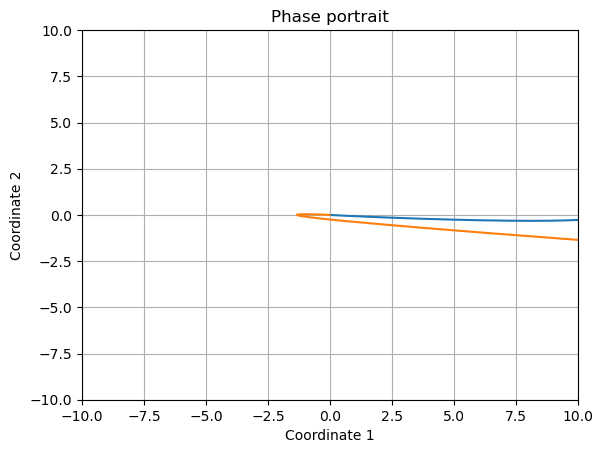

In [168]:
plt.plot(trajectory[:1000],speeds_stack)
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Phase portrait")

Text(0.5, 1.0, 'Phase portrait')

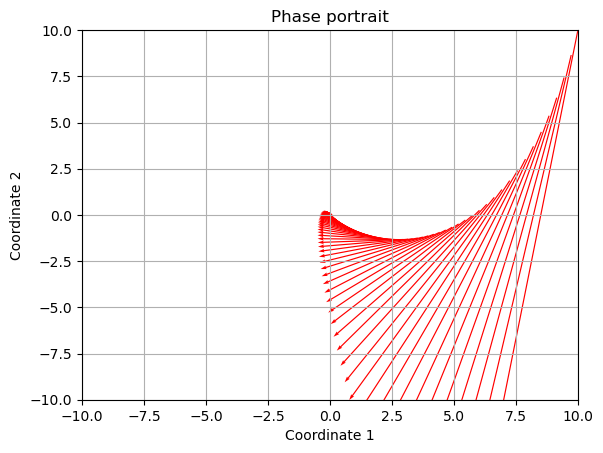

In [178]:
plt.quiver(trajectory[:1000,0], trajectory[:1000,1], speeds_stack[:,0], speeds_stack[:,1], color= 'r', label= 'original field')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Phase portrait")

Text(0.5, 1.0, 'Phase portrait')

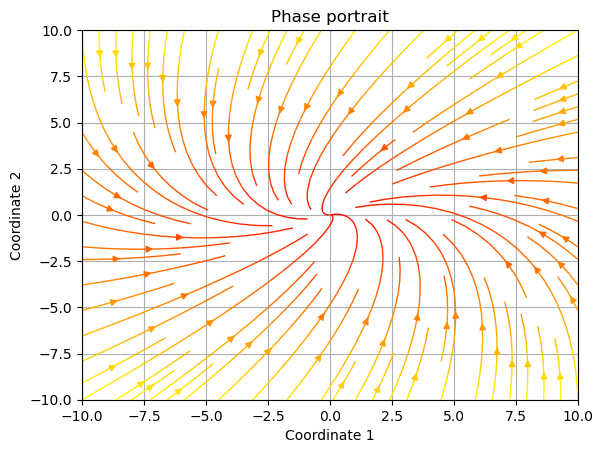

In [188]:
x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 1000)
X, Y = np.meshgrid(x, y)
DX = A_estim[0,0]*X + A_estim[0,1]*Y
DY = A_estim[1,0]*X + A_estim[1,1]*Y

plt.streamplot(X, Y, DX, DY, linewidth =1, color =np. sqrt (DX ** 2 + DY ** 2), cmap = 'autumn')
plt.xlabel("Coordinate 1")
plt.ylabel("Coordinate 2")
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()
plt.title("Phase portrait")